In [1]:
import numpy as np
import seaborn as sns

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tt = [200,237,222,298,300,270,208,320,1,333,245,22000]

In [29]:
tips.loc[outliers_zscore(tips.tip)]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
88,24.71,5.85,Male,No,Thur,Lunch,2
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3


In [6]:
def outlier_iqr(data):
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 +(iqr*1.5)
    return np.where((data>upper_bound) | (data < lower_bound))

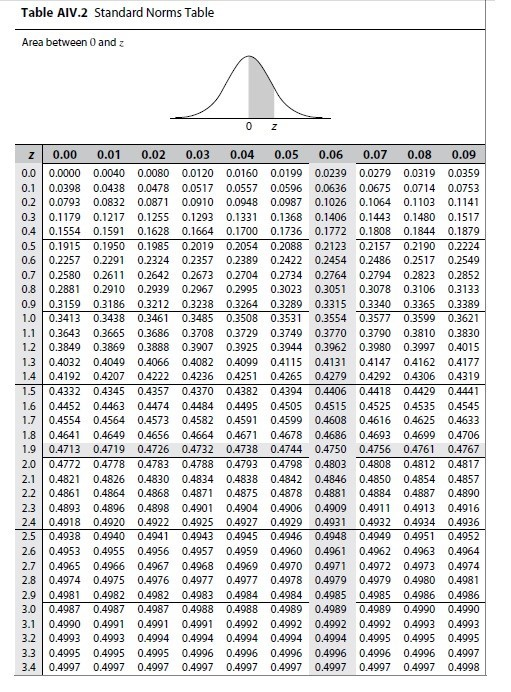

In [13]:
outlier_iqr(tt)

(array([ 8, 11], dtype=int64),)

In [14]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [19]:
outlier_iqr(tips.tip)

(array([ 23,  47,  59, 141, 170, 183, 212, 214, 239], dtype=int64),)

In [20]:
tips.loc[outlier_iqr(tips.tip)]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3


In [24]:
def outliers_zscore(data):
    threshold = 2
    mean = np.mean(data)
    std = np.std(data)
    z_score = [(xx-mean)/std for xx in data]
    return np.where(np.abs(z_score) > threshold)

In [25]:
outliers_zscore(tt)

(array([11], dtype=int64),)

In [26]:
outliers_zscore(tips.tip)

(array([ 23,  47,  59,  88, 141, 170, 183, 212, 214, 239], dtype=int64),)